r3d shape: (264, 61, 63)
theta3d shape: (264, 61, 63)
phi3d shape: (264, 61, 63)
f_data shape: (264, 61, 63)
dr =  0.24583333333333335
dtheta =  0.0532473331116914
dphi =  0.10134169850289654
l = 0
l = 1
l = 2
l = 3
l = 4
l = 5
l = 6
l = 7
l = 8
l = 9
l = 10


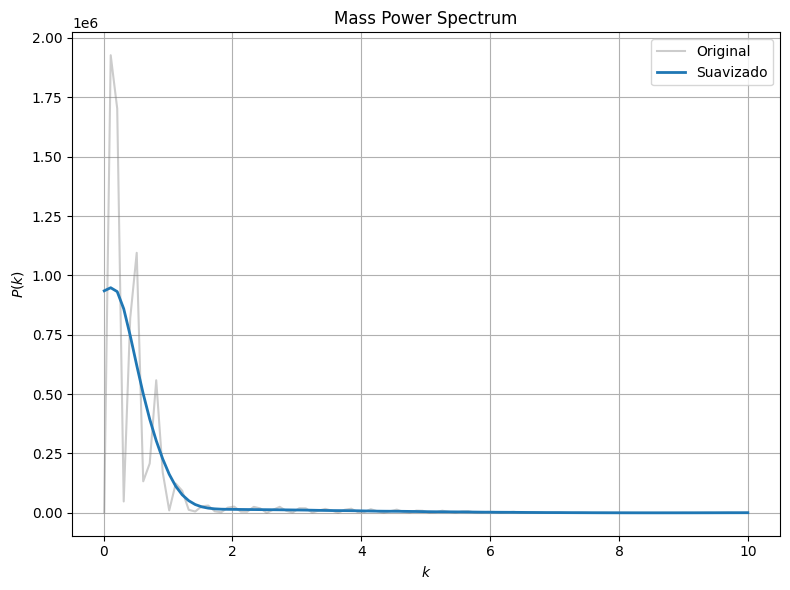

In [6]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from spherical_fourier_module import general_fourier_spherical_transform, compute_mass_power_spectrum

# === Parámetros ===
filename = "test_6/phi.h5"
snapshot = "phi_0"
l_max = 10
Nk = 100
m = 1.0  # masa del campo escalar
k_values = np.linspace(1e-2, 10.0, Nk)

# === Leer datos del archivo HDF5 ===
with h5py.File(filename, "r") as f:
    group = f["/refinement_1"]

    # Transponer del orden Fortran [k,j,i] → [i,j,k]
    r3d = group["Xcoord"][:].transpose(2, 1, 0)
    theta3d = group["Ycoord"][:].transpose(2, 1, 0)
    phi3d = group["Zcoord"][:].transpose(2, 1, 0)
    f_data = group[snapshot][:].transpose(2, 1, 0)

# === Estimar diferenciales usando valores únicos
r_unique = np.sort(np.unique(r3d))
theta_unique = np.sort(np.unique(theta3d))
phi_unique = np.sort(np.unique(phi3d))
dr = np.mean(np.diff(r_unique))
dtheta = np.mean(np.diff(theta_unique))
dphi = np.mean(np.diff(phi_unique))

print("r3d shape:", r3d.shape)
print("theta3d shape:", theta3d.shape)
print("phi3d shape:", phi3d.shape)
print("f_data shape:", f_data.shape)

print("dr = ", dr)
print("dtheta = ", dtheta)
print("dphi = ", dphi)

# === Calcular densidad de energía escalar
rho = m**2 * f_data**2

# === Elemento de volumen diferencial
dV = r3d**2 * np.sin(theta3d) * dr * dtheta * dphi

# === Promedio ponderado
rho_avg = np.sum(rho * dV) / np.sum(dV)

# === Contraste de densidad
delta = (rho - rho_avg) / rho_avg

# === Transformada y espectro
a_nlm = general_fourier_spherical_transform(delta, r3d, theta3d, phi3d, l_max, k_values, dr, dtheta, dphi)
Pk = compute_mass_power_spectrum(a_nlm)
Pk_smooth = gaussian_filter1d(Pk, sigma=2)

# === Graficar
plt.figure(figsize=(8, 6))
plt.plot(k_values, Pk, label="Original", alpha=0.4, color="gray")
plt.plot(k_values, Pk_smooth, label="Suavizado", linewidth=2)
plt.xlabel(r"$k$")
plt.ylabel(r"$P(k)$")
plt.title("Mass Power Spectrum")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


dr =  0.29500000000000004
dtheta =  0.049866550056980846
dphi =  0.10134169850289654
l = 0
l = 1
l = 2
l = 3
l = 4
l = 5
l = 6
l = 7
l = 8
l = 9
l = 10


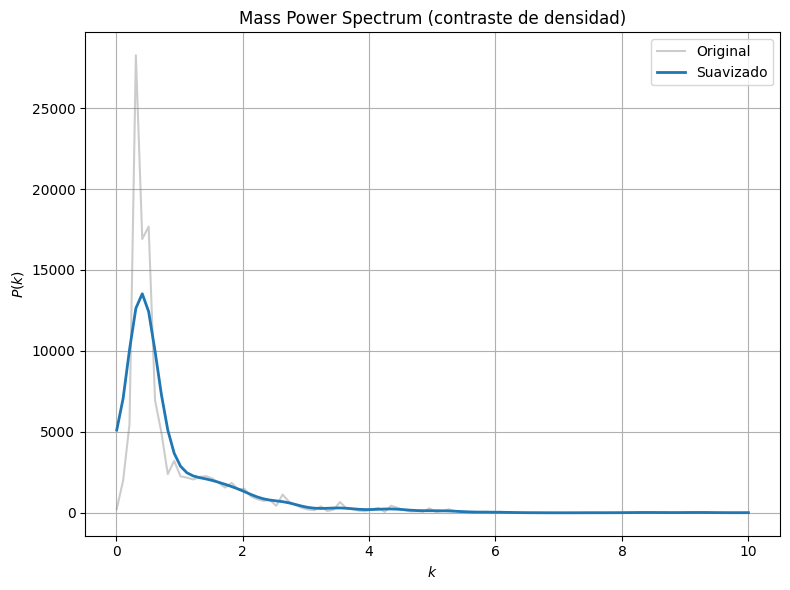

In [4]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from spherical_fourier_module import general_fourier_spherical_transform, compute_mass_power_spectrum

# === Parámetros ===
filename = "test/phi.h5"
snapshot = "phi_36"
l_max = 10
Nk = 100
m = 1.0  # masa del campo escalar
k_values = np.linspace(1e-2, 10.0, Nk)

# === Leer datos del archivo HDF5 ===
with h5py.File(filename, "r") as f:
    group = f["/refinement_1"]

    # Transponer del orden Fortran [k,j,i] → [i,j,k]
    r3d = group["Xcoord"][:].transpose(2, 1, 0)
    theta3d = group["Ycoord"][:].transpose(2, 1, 0)
    phi3d = group["Zcoord"][:].transpose(2, 1, 0)
    f_data = group[snapshot][:].transpose(2, 1, 0)

# === Estimar diferenciales usando valores únicos
r_unique = np.sort(np.unique(r3d))
theta_unique = np.sort(np.unique(theta3d))
phi_unique = np.sort(np.unique(phi3d))
dr = np.mean(np.diff(r_unique))
dtheta = np.mean(np.diff(theta_unique))
dphi = np.mean(np.diff(phi_unique))

print("dr = ", dr)
print("dtheta = ", dtheta)
print("dphi = ", dphi)

# === Calcular densidad de energía escalar
rho = m**2 * f_data**2

# === Elemento de volumen diferencial
dV = r3d**2 * np.sin(theta3d) * dr * dtheta * dphi

# === Promedio ponderado
rho_avg = np.sum(rho * dV) / np.sum(dV)

# === Contraste de densidad
delta = (rho - rho_avg) / rho_avg

# === Transformada y espectro
a_nlm = general_fourier_spherical_transform(delta, r3d, theta3d, phi3d, l_max, k_values, dr, dtheta, dphi)
Pk = compute_mass_power_spectrum(a_nlm)
Pk_smooth = gaussian_filter1d(Pk, sigma=2)

# === Graficar
plt.figure(figsize=(8, 6))
plt.plot(k_values, Pk, label="Original", alpha=0.4, color="gray")
plt.plot(k_values, Pk_smooth, label="Suavizado", linewidth=2)
plt.xlabel(r"$k$")
plt.ylabel(r"$P(k)$")
plt.title("Mass Power Spectrum")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Procesando phi_0...
Procesando phi_1...
Procesando phi_2...
Procesando phi_3...
Procesando phi_4...
Procesando phi_5...
Procesando phi_6...
Procesando phi_7...
Procesando phi_8...
Procesando phi_9...
Procesando phi_10...
Procesando phi_11...
Procesando phi_12...
Procesando phi_13...
Procesando phi_14...
Procesando phi_15...
Procesando phi_16...
Procesando phi_17...
Procesando phi_18...
Procesando phi_19...
Procesando phi_20...
Procesando phi_21...
Procesando phi_22...
Procesando phi_23...
Procesando phi_24...
Procesando phi_25...
Procesando phi_26...
Procesando phi_27...
Procesando phi_28...
Procesando phi_29...
Procesando phi_30...
Procesando phi_31...
Procesando phi_32...
Procesando phi_33...
Procesando phi_34...
Procesando phi_35...
Procesando phi_36...
Procesando phi_37...
Procesando phi_38...
Procesando phi_39...
Procesando phi_40...
Procesando phi_41...
Procesando phi_42...
Procesando phi_43...
Procesando phi_44...
Procesando phi_45...
Procesando phi_46...
Procesando phi_47...
Pr

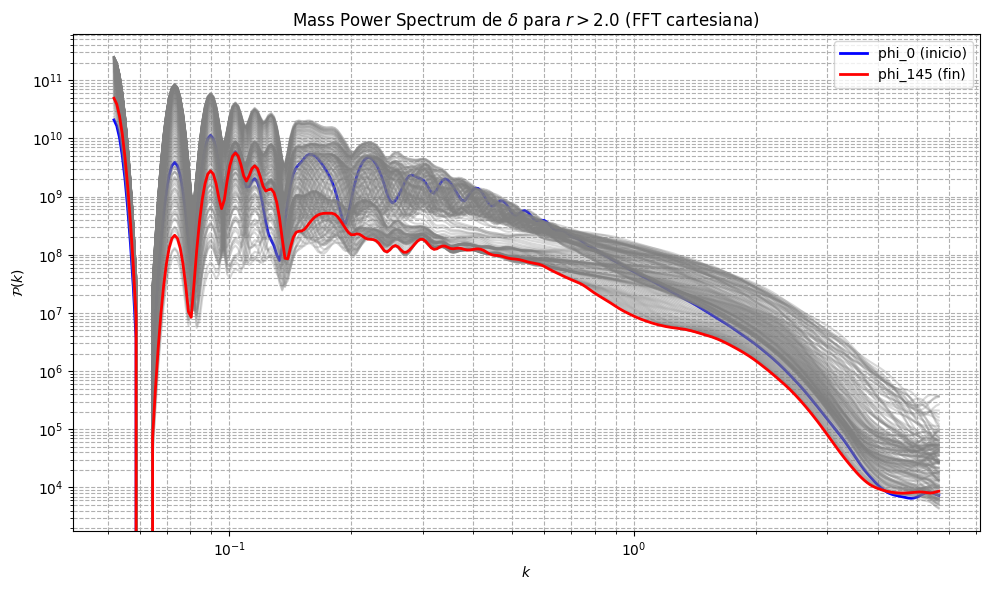

Graficando corte xz de phi_0...


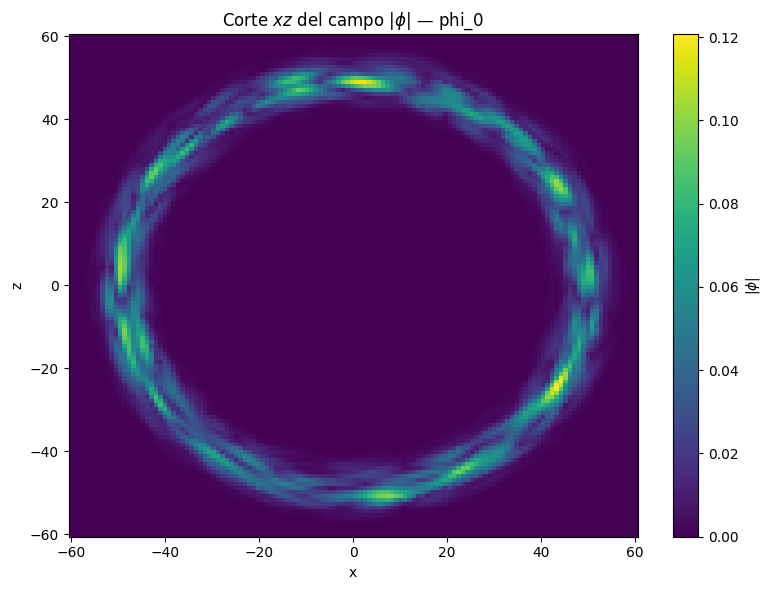

Graficando corte xz de phi_145...


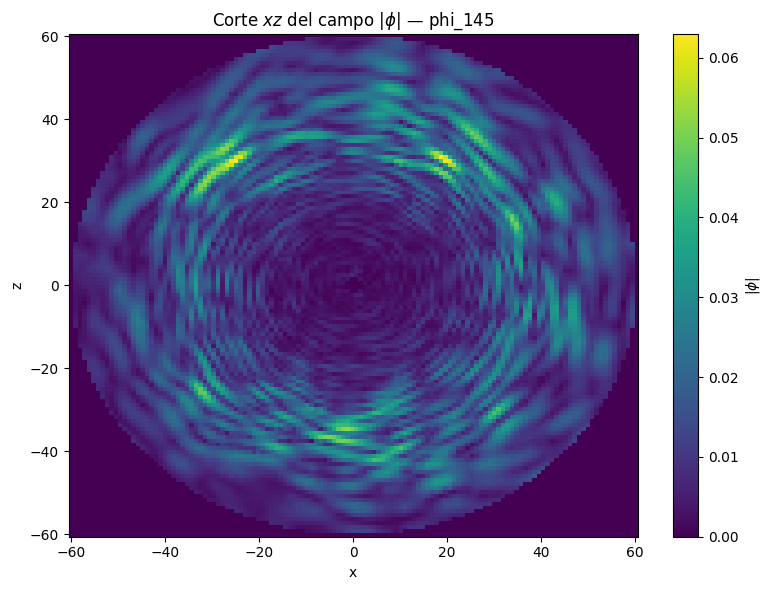

✅ MPS y cortes xz generados correctamente.


In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator
from scipy.ndimage import gaussian_filter1d

def make_strictly_increasing(arr):
    diff = np.diff(arr)
    valid = np.where(diff > 0)[0] + 1
    valid = np.insert(valid, 0, 0)
    return arr[valid], valid

# === Parámetros ===
filename = "test/phi.h5"
groupname = "/refinement_1"
N = 128
nbins = 300
R_min = 2.0
m = 1.0  # masa del campo escalar

# === Leer archivo y coordenadas
with h5py.File(filename, "r") as f:
    group = f[groupname]
    keys = [k for k in group.keys() if k.startswith("phi_")]
    keys = sorted(keys, key=lambda s: int(s.split('_')[1]))

    r3d = group["Xcoord"][:].transpose(2, 1, 0)
    theta3d = group["Ycoord"][:].transpose(2, 1, 0)
    phi3d = group["Zcoord"][:].transpose(2, 1, 0)

    r_raw = r3d[:, 0, 0]
    theta_raw = theta3d[0, :, 0]
    phi_raw = phi3d[0, 0, :]

    r_sorted, r_idx = make_strictly_increasing(np.sort(r_raw))
    theta_sorted, theta_idx = make_strictly_increasing(np.sort(theta_raw))
    phi_sorted, phi_idx = make_strictly_increasing(np.sort(phi_raw))

    R_max = r_sorted[-1]
    R_cube = R_max 

    x = np.linspace(-R_cube, R_cube, N)
    dx = x[1] - x[0]
    z = x.copy()
    k_vals = np.fft.fftshift(np.fft.fftfreq(N, d=dx)) * 2 * np.pi
    kx, ky, kz = np.meshgrid(k_vals, k_vals, k_vals, indexing='ij')
    k_mag = np.sqrt(kx**2 + ky**2 + kz**2)
    k_flat = k_mag.ravel()

    k_min = k_flat[k_flat > 0].min()
    k_max = k_flat.max()
    k_bins = np.logspace(np.log10(k_min), np.log10(k_max), nbins + 1)
    k_centers = 0.5 * (k_bins[:-1] + k_bins[1:])

    X, Y, Z = np.meshgrid(x, x, x, indexing='ij')
    R = np.sqrt(X**2 + Y**2 + Z**2)
    mask_inside = (R >= R_min) & (R <= R_max)
    Theta = np.arccos(np.clip(Z / R, -1.0, 1.0))
    Phi = np.arctan2(Y, X) % (2 * np.pi)
    interp_points = np.stack([R, Theta, Phi], axis=-1)

    spectra_all = []

    for snapshot in keys:
        print(f"Procesando {snapshot}...")
        f_data = group[snapshot][:].transpose(2, 1, 0)
        f_clean = f_data[np.ix_(r_idx, theta_idx, phi_idx)]

        interp_func = RegularGridInterpolator(
            (r_sorted, theta_sorted, phi_sorted),
            f_clean,
            bounds_error=False,
            fill_value=0.0
        )

        phi_abs = np.zeros_like(R)
        phi_abs[mask_inside] = interp_func(interp_points[mask_inside])

        rho = m * phi_abs**2
        rho_avg = np.mean(rho[mask_inside])
        delta = (rho - rho_avg) / rho_avg

        F_k = np.fft.fftn(delta)
        F_k_shifted = np.fft.fftshift(F_k)
        P_k = np.abs(F_k_shifted)**2
        Pk_flat = P_k.ravel()

        inds = np.digitize(k_flat, bins=k_bins)
        Pk_binned = np.zeros(nbins)
        for i in range(1, nbins + 1):
            mask = inds == i
            if np.any(mask):
                Pk_binned[i - 1] = Pk_flat[mask].mean()

        spectra_all.append(Pk_binned)

spectra_all = np.array(spectra_all)
spectra_smooth = gaussian_filter1d(spectra_all, sigma=2, axis=1)

# === Graficar espectros
plt.figure(figsize=(10, 6))
for i, Pk in enumerate(spectra_smooth):
    if i == 0:
        plt.loglog(k_centers, Pk, color='blue', linewidth=2, label=f"{keys[0]} (inicio)")
    elif i == len(keys) - 1:
        plt.loglog(k_centers, Pk, color='red', linewidth=2, label=f"{keys[-1]} (fin)")
    else:
        plt.loglog(k_centers, Pk, alpha=0.3, color='gray')

plt.xlabel(r"$k$")
plt.ylabel(r"$\mathcal{P}(k)$")
plt.title(f"Mass Power Spectrum de $\\delta$ para $r > {R_min}$ (FFT cartesiana)")
plt.grid(True, which='both', ls='--')
plt.legend()
plt.tight_layout()
plt.show()

# === Guardar MPS del primer y último snapshot
np.savetxt("MPS_inicio.csv", np.column_stack([k_centers, spectra_smooth[0]]),
           header="k_center,P_k", delimiter=",", comments='')
np.savetxt("MPS_fin.csv", np.column_stack([k_centers, spectra_smooth[-1]]),
           header="k_center,P_k", delimiter=",", comments='')

# === Corte xz del campo interpolado (primer y último snapshot)
idx_y = N // 2  # plano y = 0

for i, snapshot in zip([0, -1], [keys[0], keys[-1]]):
    print(f"Graficando corte xz de {snapshot}...")
    with h5py.File(filename, "r") as f:
        f_data = f[groupname][snapshot][:].transpose(2, 1, 0)
        f_clean = f_data[np.ix_(r_idx, theta_idx, phi_idx)]

        interp_func = RegularGridInterpolator(
            (r_sorted, theta_sorted, phi_sorted),
            f_clean,
            bounds_error=False,
            fill_value=0.0
        )

        phi_abs = np.zeros_like(R)
        phi_abs[mask_inside] = interp_func(interp_points[mask_inside])

        plt.figure(figsize=(8, 6))
        plt.imshow(phi_abs[:, idx_y, :], extent=[x[0], x[-1], z[0], z[-1]],
                   origin='lower', cmap='viridis', aspect='auto')
        plt.colorbar(label=r"$|\phi|$")
        plt.title(f"Corte $xz$ del campo $|\phi|$ — {snapshot}")
        plt.xlabel("x")
        plt.ylabel("z")
        plt.tight_layout()
        plt.show()

print("✅ MPS y cortes xz generados correctamente.")


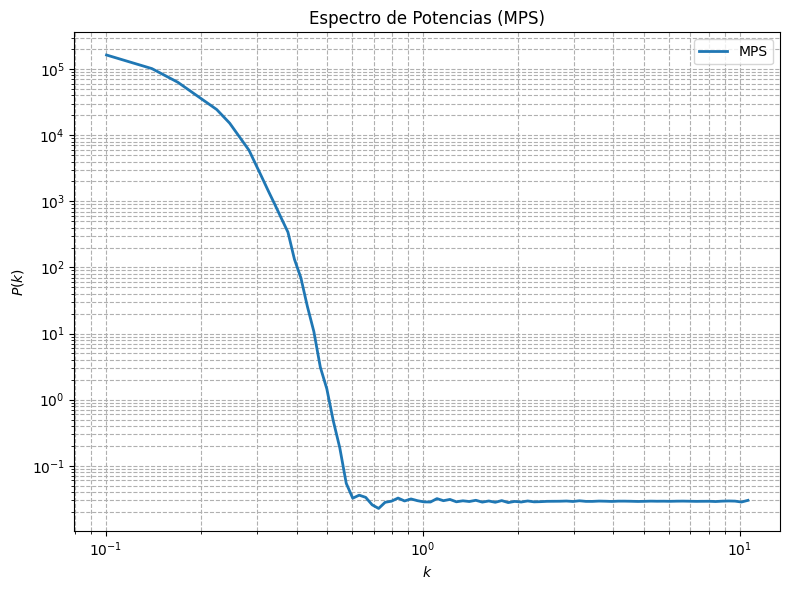

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fftn, fftfreq

# === Simulación de un campo delta_rho 3D ===
np.random.seed(42)
N = 128
box_size = 64.0
x = np.linspace(-box_size/2, box_size/2, N)
X, Y, Z = np.meshgrid(x, x, x, indexing='ij')
rho = np.exp(-((X**2 + Y**2 + Z**2)/100)) + 0.01*np.random.randn(N,N,N)
rho_avg = np.mean(rho)
delta_rho = (rho - rho_avg) / rho_avg

# === FFT normalizada ===
delta_k = fftn(delta_rho, norm="ortho")
power = np.abs(delta_k)**2
power *= (box_size**3 / np.prod(delta_rho.shape))

# === Preparar k_mag ===
kx = 2 * np.pi * fftfreq(N, d=box_size / N)
ky = 2 * np.pi * fftfreq(N, d=box_size / N)
kz = 2 * np.pi * fftfreq(N, d=box_size / N)
kx, ky, kz = np.meshgrid(kx, ky, kz, indexing='ij')
k_mag = np.sqrt(kx**2 + ky**2 + kz**2).ravel()
power_flat = power.ravel()

# === Binning logarítmico ===
n_bins = 100
k_bins = np.logspace(np.log10(np.min(k_mag[k_mag > 0])), np.log10(np.max(k_mag)), n_bins + 1)
k_center = np.sqrt(k_bins[:-1] * k_bins[1:])

# === Histogramas para MPS ===
mask = (k_mag > 0) & np.isfinite(power_flat)
Pk_sum, _ = np.histogram(k_mag[mask], bins=k_bins, weights=power_flat[mask])
Pk_count, _ = np.histogram(k_mag[mask], bins=k_bins)
valid = Pk_count > 0
Pk = np.zeros_like(k_center)
Pk[valid] = Pk_sum[valid] / Pk_count[valid]

# === Gráfica ===
plt.figure(figsize=(8,6))
plt.loglog(k_center[valid], Pk[valid], label="MPS", linewidth=2)
plt.xlabel(r"$k$")
plt.ylabel(r"$P(k)$")
plt.title("Espectro de Potencias (MPS)")
plt.grid(True, which="both", ls="--")
plt.legend()
plt.tight_layout()
plt.show()


Procesando phi_0...
Procesando phi_1...
Procesando phi_2...
Procesando phi_3...
Procesando phi_4...
Procesando phi_5...
Procesando phi_6...
Procesando phi_7...
Procesando phi_8...
Procesando phi_9...
Procesando phi_10...
Procesando phi_11...
Procesando phi_12...
Procesando phi_13...
Procesando phi_14...
Procesando phi_15...
Procesando phi_16...
Procesando phi_17...
Procesando phi_18...
Procesando phi_19...
Procesando phi_20...
Procesando phi_21...
Procesando phi_22...
Procesando phi_23...
Procesando phi_24...
Procesando phi_25...
Procesando phi_26...
Procesando phi_27...
Procesando phi_28...
Procesando phi_29...
Procesando phi_30...
Procesando phi_31...
Procesando phi_32...
Procesando phi_33...
Procesando phi_34...
Procesando phi_35...
Procesando phi_36...
Procesando phi_37...
Procesando phi_38...
Procesando phi_39...
Procesando phi_40...
Procesando phi_41...
Procesando phi_42...
Procesando phi_43...
Procesando phi_44...
Procesando phi_45...
Procesando phi_46...
Procesando phi_47...
Pr

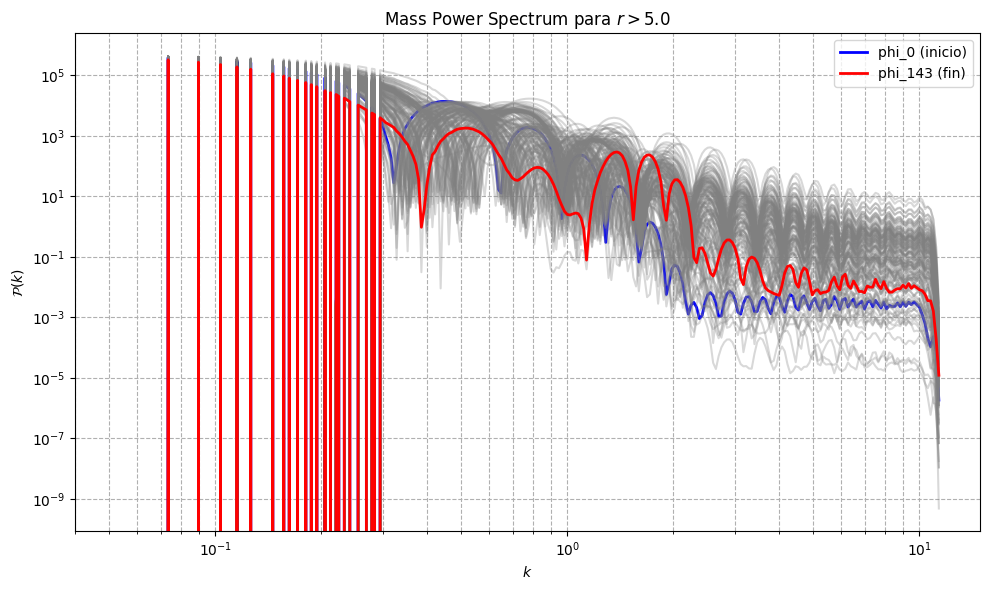

In [8]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator
from scipy.fft import fftn, fftfreq

def make_strictly_increasing(arr):
    diff = np.diff(arr)
    valid = np.where(diff > 0)[0] + 1
    valid = np.insert(valid, 0, 0)
    return arr[valid], valid

# === Parámetros ===
filename = "test_6/phi.h5"
groupname = "/refinement_1"
N = 256             # resolución cartesiana
nbins = 300         # número de bins en k
R_min = 5.0        # radio mínimo
m = 1.0             # masa del campo escalar

# === Leer archivo y coordenadas
with h5py.File(filename, "r") as f:
    group = f[groupname]
    keys = [k for k in group.keys() if k.startswith("phi_")]
    keys = sorted(keys, key=lambda s: int(s.split('_')[1]))

    r3d = group["Xcoord"][:].transpose(2, 1, 0)
    theta3d = group["Ycoord"][:].transpose(2, 1, 0)
    phi3d = group["Zcoord"][:].transpose(2, 1, 0)

    r_raw = r3d[:, 0, 0]
    theta_raw = theta3d[0, :, 0]
    phi_raw = phi3d[0, 0, :]

    r_sorted, r_idx = make_strictly_increasing(np.sort(r_raw))
    theta_sorted, theta_idx = make_strictly_increasing(np.sort(theta_raw))
    phi_sorted, phi_idx = make_strictly_increasing(np.sort(phi_raw))

    R_max = r_sorted[-1]
    R_cube = R_max
    x = np.linspace(-R_cube, R_cube, N)
    dx = x[1] - x[0]
    X, Y, Z = np.meshgrid(x, x, x, indexing='ij')
    R = np.sqrt(X**2 + Y**2 + Z**2)
    mask_inside = (R >= R_min) & (R <= R_max)

    Theta = np.arccos(np.clip(Z / R, -1.0, 1.0))
    Phi = np.arctan2(Y, X) % (2 * np.pi)
    interp_points = np.stack([R, Theta, Phi], axis=-1)

    # === Preparar malla k
    kx = 2 * np.pi * fftfreq(N, d=dx)
    ky = 2 * np.pi * fftfreq(N, d=dx)
    kz = 2 * np.pi * fftfreq(N, d=dx)
    kx, ky, kz = np.meshgrid(kx, ky, kz, indexing='ij')
    k_mag = np.sqrt(kx**2 + ky**2 + kz**2).ravel()

    k_min = k_mag[k_mag > 0].min()
    k_max = k_mag.max()
    k_bins = np.logspace(np.log10(k_min), np.log10(k_max), nbins + 1)
    k_centers = np.sqrt(k_bins[:-1] * k_bins[1:])

    # === Inicializar MPS
    spectra_all = []

    for i_snap, snapshot in enumerate(keys):
        print(f"Procesando {snapshot}...")

        f_data = group[snapshot][:].transpose(2, 1, 0)
        f_clean = f_data[np.ix_(r_idx, theta_idx, phi_idx)]

        interp_func = RegularGridInterpolator(
            (r_sorted, theta_sorted, phi_sorted), f_clean,
            bounds_error=False, fill_value=0.0
        )

        phi_abs = np.zeros_like(R)
        phi_abs[mask_inside] = interp_func(interp_points[mask_inside])

        rho = m * phi_abs**2
        rho_avg = np.mean(rho[mask_inside])
        delta = (rho - rho_avg) / rho_avg

        # === FFT y espectro
        delta_k = fftn(delta, norm="ortho")
        power = np.abs(delta_k)**2
        power *= (2*R_cube)**3 / np.prod(delta.shape)
        power_flat = power.ravel()

        # === Binning por magnitud de k
        mask_k = (k_mag > 0) & np.isfinite(power_flat)
        Pk_sum, _ = np.histogram(k_mag[mask_k], bins=k_bins, weights=power_flat[mask_k])
        Pk_count, _ = np.histogram(k_mag[mask_k], bins=k_bins)
        Pk = np.zeros_like(k_centers)
        valid = Pk_count > 0
        Pk[valid] = Pk_sum[valid] / Pk_count[valid]
        spectra_all.append(Pk)

# === Convertir a array
spectra_all = np.array(spectra_all)

# === Guardar todos los datos en archivo comprimido
np.savez("MPS_todos_snapshots.npz", k_centers=k_centers, spectra_all=spectra_all, snapshots=np.array(keys))
print("📁 Archivo 'MPS_todos_snapshots.npz' guardado con éxito.")

# === Guardar espectros inicial y final en formato CSV legible
np.savetxt("MPS_inicio.csv", np.column_stack([k_centers, spectra_all[0]]),
           header="k_center,P_k", delimiter=",", comments='')
np.savetxt("MPS_fin.csv", np.column_stack([k_centers, spectra_all[-1]]),
           header="k_center,P_k", delimiter=",", comments='')
print("📄 Archivos 'MPS_inicio.csv' y 'MPS_fin.csv' guardados.")

# === Graficar
plt.figure(figsize=(10, 6))
for i, Pk in enumerate(spectra_all):
    if i == 0:
        plt.loglog(k_centers, Pk, color='blue', linewidth=2, label=f"{keys[0]} (inicio)")
    elif i == len(keys) - 1:
        plt.loglog(k_centers, Pk, color='red', linewidth=2, label=f"{keys[-1]} (fin)")
    else:
        plt.loglog(k_centers, Pk, alpha=0.3, color='gray')

plt.xlabel(r"$k$")
plt.ylabel(r"$\mathcal{P}(k)$")
plt.title(f"Mass Power Spectrum para $r > {R_min}$")
plt.grid(True, which='both', ls='--')
plt.legend()
plt.tight_layout()
plt.show()
